# CIFAR-10 CNN

CIFAR-10: https://www.cs.toronto.edu/~kriz/cifar.html

O conjunto de dados CIFAR-10 possui 600000 imagens coloridas de dimensões $32\times 32$. Os dados são divididos em 10 casses com 6000 imagens por classe. 

O exemplo abaixo é uma adaptação do exemplo fornecido na documentação do Keras: 
https://github.com/fchollet/keras/blob/master/examples/cifar10_cnn.py Nele, nós utilizamos apenas 3 das 10 classes. A saída das diferentes camadas da CNN são mostradas.

## Importando as bibliotecas


In [88]:
#Importando as bibliotecas necessárias
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import numpy as np
import cv2

## Carregando e mostrando os dados

X_train shape: (15000, 1, 32, 32)
15000 amostras de treinamento
3000 amostras de teste


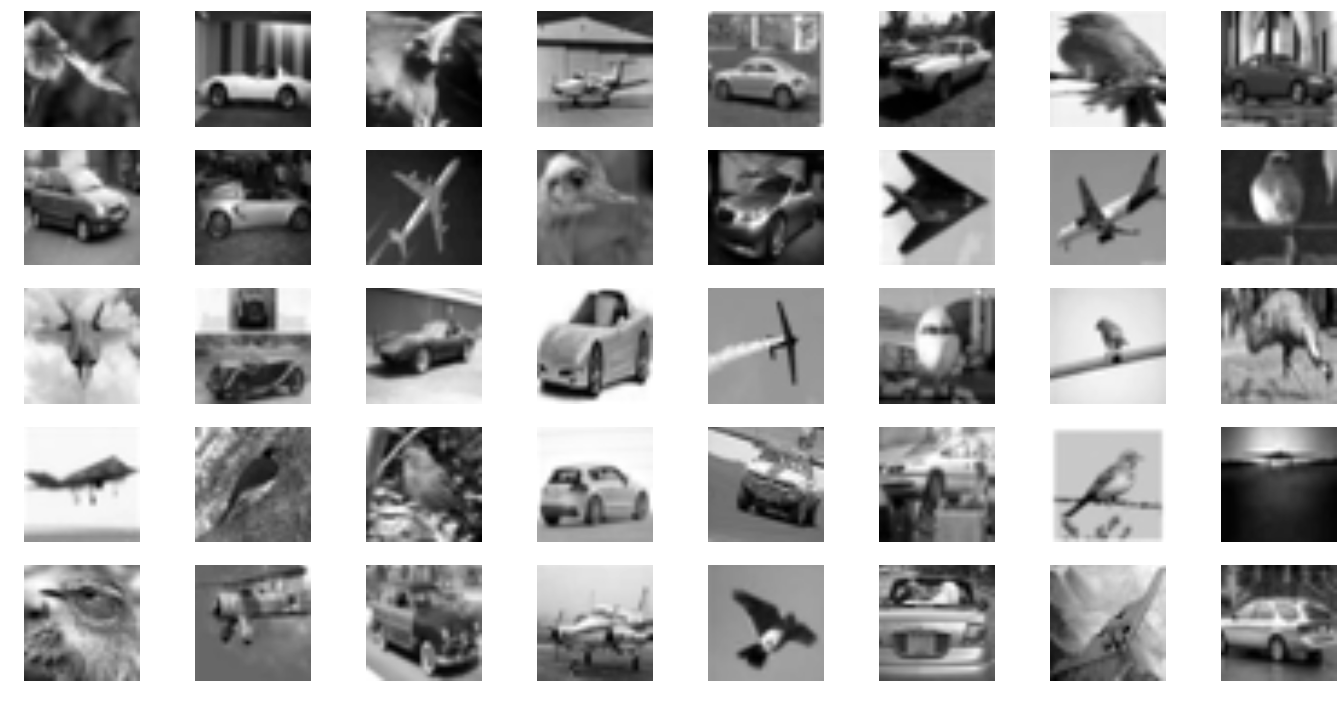

In [96]:
# Carregando os dados
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = y_train.ravel()
y_test = y_test.ravel()


#Selecionando apenas objetos das classes: 0, 1, 2
indexes_train = (y_train == 0) | (y_train == 1) | (y_train == 2)
X_train = X_train[indexes_train].mean(axis=1)[:,np.newaxis,:,:] #RGB para cinza
y_train = y_train[indexes_train]

indexes_test = (y_test == 0) | (y_test == 1) | (y_test == 2) 
X_test = X_test[indexes_test].mean(axis=1)[:,np.newaxis,:,:] #RGB para cinza
y_test = y_test[indexes_test]

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'amostras de treinamento')
print(X_test.shape[0], 'amostras de teste')

#Mostrando algumas imagens do conjunto de teste
plt.figure(figsize=(24, 12))

for k, i in enumerate(np.random.choice(np.arange(0, len(y_test)), size=(40,))):
    plt.subplot(5, 8, k + 1)
    image = (X_test[i])
    image = cv2.resize(image[0], (96, 96), interpolation=cv2.INTER_LINEAR)
    
    # mostra as imagens
    plt.imshow(image,cmap = 'gray')
    plt.axis('off')
    
# Transforma o vetor de labes para o formato de one-hot encoding.
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)


img_rows, img_cols = 32, 32 # Dimensões das imagens

if K.image_dim_ordering() == 'th':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

#Normalização dos dados
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


# Construíndo a CNN com o Keras

In [97]:
batch_size = 100
nb_classes = 3 #Número de classes
nb_epoch = 25 # Numero de épocas
nb_filters = 32 # Número de filtros convoluvionais
pool_size = (2, 2) # tamanho do max-pooling
kernel_size = (3, 3) # Tamanho dos kernels de convolução


# Definindo a rede
model = Sequential()
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

# Aqui os features deixam de ser imagens
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 15000 samples, validate on 3000 samples
Epoch 1/25
15000/15000 [==============================] - 8s - loss: 0.8614 - acc: 0.5973 - val_loss: 0.6685 - val_acc: 0.7187
Epoch 2/25
15000/15000 [==============================] - 8s - loss: 0.6455 - acc: 0.7293 - val_loss: 0.5497 - val_acc: 0.7783
Epoch 3/25
15000/15000 [==============================] - 8s - loss: 0.5643 - acc: 0.7665 - val_loss: 0.5148 - val_acc: 0.7853
Epoch 4/25
15000/15000 [==============================] - 8s - loss: 0.5037 - acc: 0.7957 - val_loss: 0.5401 - val_acc: 0.7683
Epoch 5/25
15000/15000 [==============================] - 8s - loss: 0.4644 - acc: 0.8085 - val_loss: 0.4559 - val_acc: 0.8080
Epoch 6/25
15000/15000 [==============================] - 8s - loss: 0.4336 - acc: 0.8301 - val_loss: 0.4345 - val_acc: 0.8263
Epoch 7/25
15000/15000 [==============================] - 8s - loss: 0.4084 - acc: 0.8366 - val_loss: 0.4165 - val_acc: 0.8313
Epoch 8/25
15000/15000 [==============================] - 8s -

In [98]:
#Função que desenha o mosaico
def mosaic(f,N):
    d,h,w = f.shape
    nLines = np.ceil(float(d)/N)
    nCells = nLines*N
        
    fullf = np.resize(f, (nCells,h,w))
    fullf[d:nCells,:,:] = 0        
        
    Y,X = np.indices((nLines*h,N*w))
    Pts = np.array([
                   (np.floor(Y/h)*N + np.floor(X/w)).ravel(),
                   np.mod(Y,h).ravel(),
                   np.mod(X,w).ravel() ]).astype(int).reshape((3,int(nLines*h),int(N*w)))
    g = fullf[Pts[0],Pts[1],Pts[2]]
    return g

/home/adessowiki/Virtualenvs/theano/lib/python2.7/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


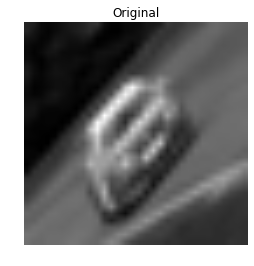

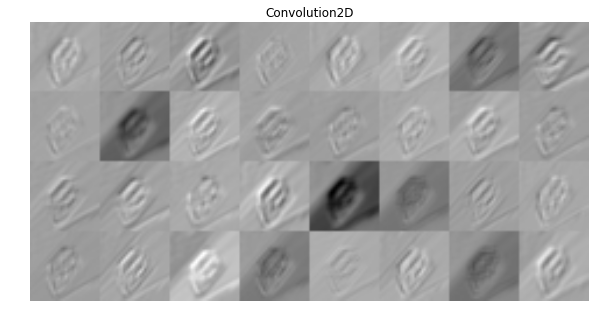

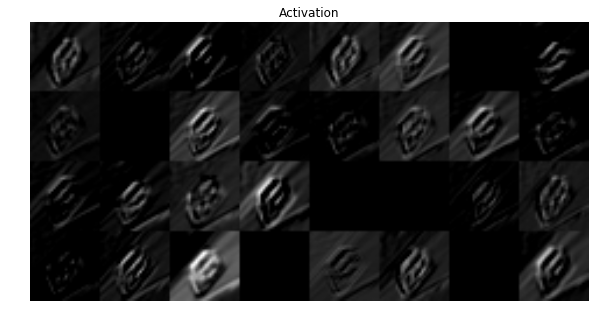

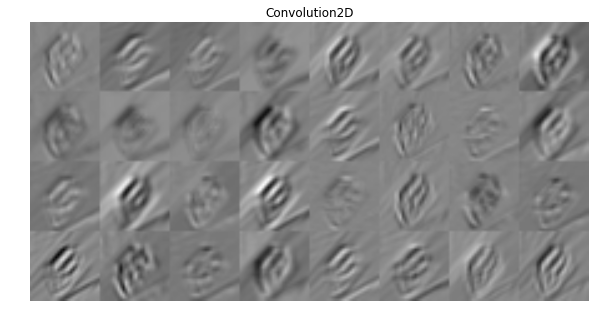

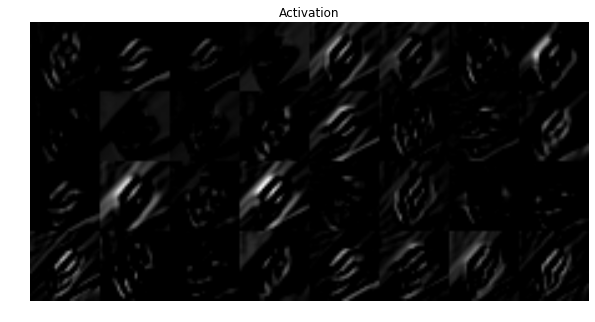

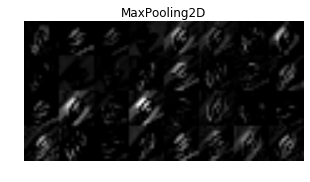

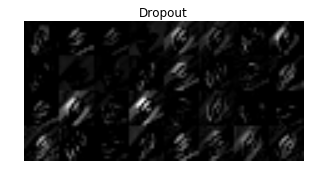

In [104]:
sn = 1780
plt.figure()
plt.imshow(X_test[sn,0,:,:],cmap = 'gray')
plt.axis('off')
plt.title("Original")
ncols = 8
H,W = 10,30
for layer in model.layers[:-6]:
    intermediate_layer_model = Model(input=model.input,output=layer.output)
    intermediate_output = intermediate_layer_model.predict(X_test[sn].reshape(1,1,32,32))
    sub_dim = intermediate_output.shape[1]
    name = str(layer).split('.')[3].split(" ")[0]
    if name =="MaxPooling2D":
        H = H/2
        W = W/2
    fig =plt.figure(figsize=(H,W))
    aux = intermediate_output[0,:,:,:]
    mos = mosaic(aux,ncols)
    plt.imshow(mos,cmap = 'gray')
    plt.axis('off')
    plt.title(name)
